# Regression ML Models

## Importing the libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Plotting configuration for Jupyter notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Importing the dataset

In [5]:
# Download the data

import os
datapath = os.path.join("Regression", "")

files = ['50_Startups.csv']
  
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jnielsonresearch/machine-learning-templates/master/"
os.makedirs(datapath, exist_ok=True)
for filename in files:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "Regression/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

dataset = pd.read_csv(datapath + files[0])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


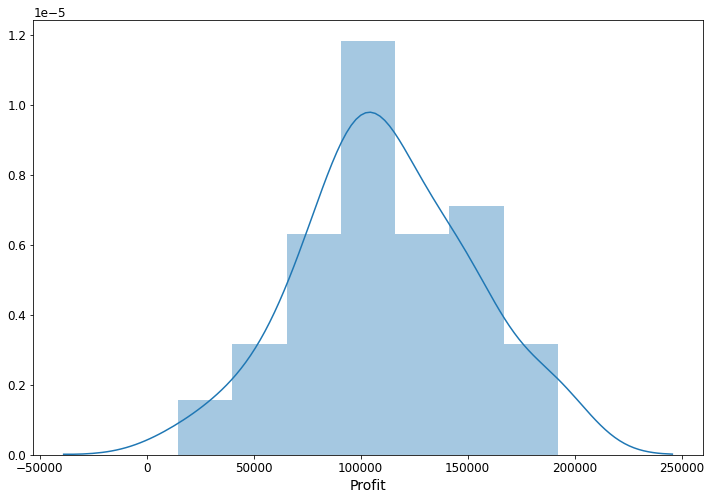

In [8]:
# Distribution plot of dependent variable y 
plt.figure(figsize=(12,8))
sns.distplot(dataset['Profit'])

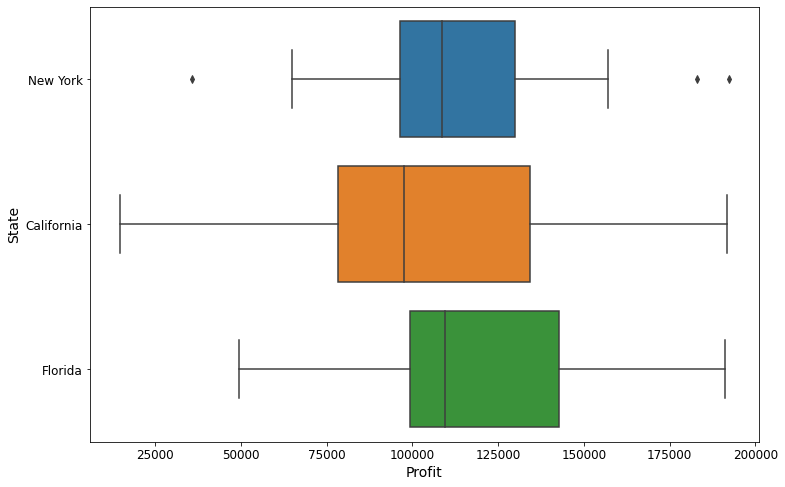

In [9]:
# Profit by State
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='Profit',y='State')

## Pairplot and Covariance Matrix of Numerical Variables

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


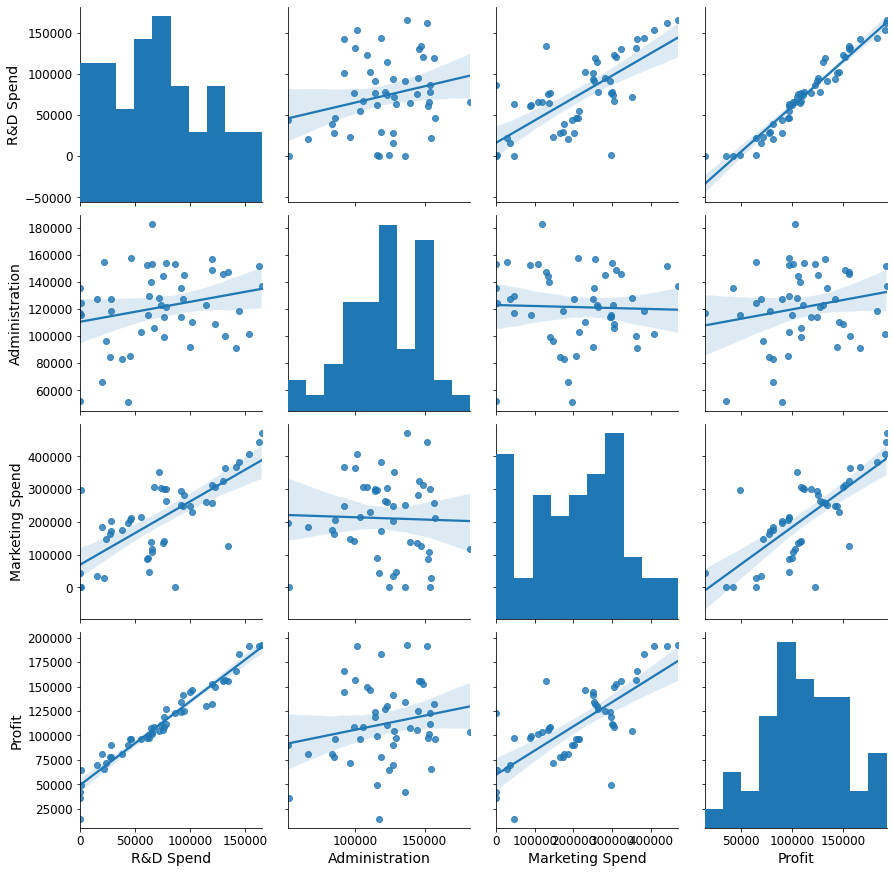

In [10]:
num_cols = dataset.select_dtypes('number').columns
sns.pairplot(dataset[num_cols], size=3.0, kind='reg')

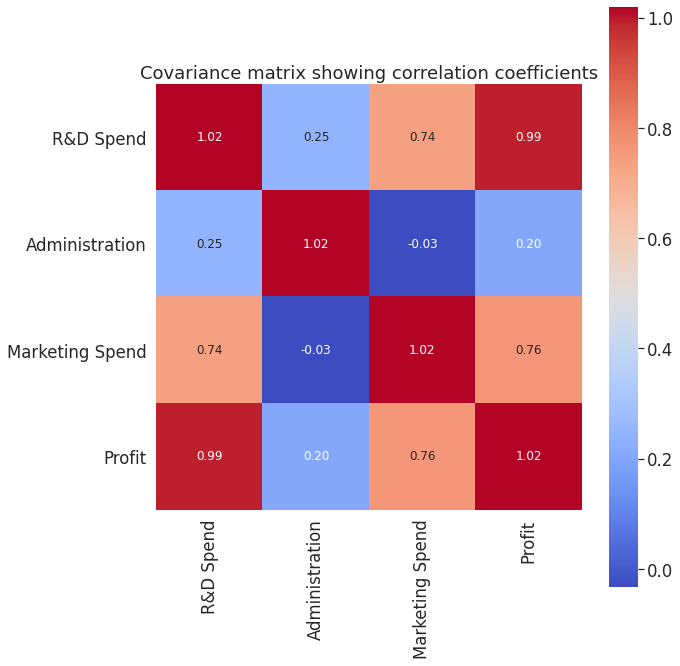

In [11]:
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(dataset[num_cols])
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=num_cols,
                 xticklabels=num_cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

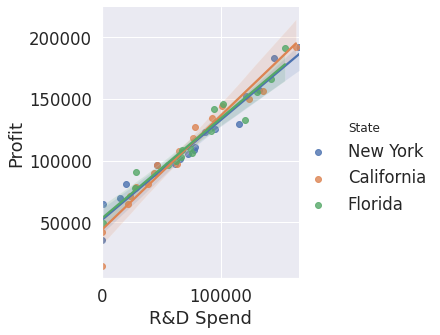

In [12]:
# Visualizing R&D Spend vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='R&D Spend',y='Profit', hue="State", data=dataset,)

<Figure size 1440x720 with 0 Axes>

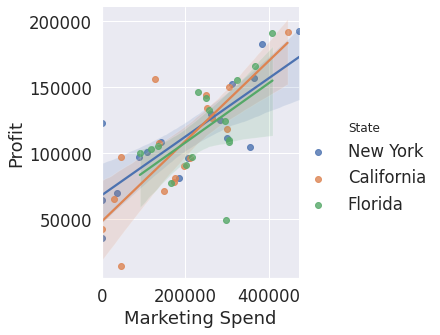

In [13]:
# Visualizing Marketing Spend vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='Marketing Spend',y='Profit', hue="State", data=dataset,)

<Figure size 1440x720 with 0 Axes>

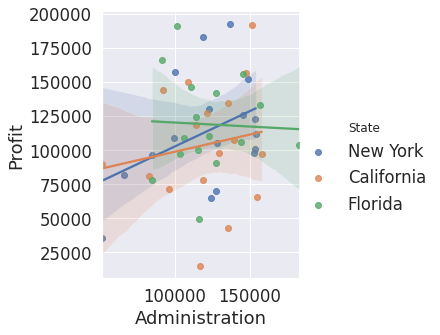

In [14]:
# Visualizing Administration vs. Profit by State
plt.figure(figsize=(20,10))
sns.lmplot(x='Administration',y='Profit', hue="State", data=dataset,)

## Encoding categorical data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
X[0:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Scaling and Train Test Split of Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Evaluation of Linear Regression Model on Training and Test sets

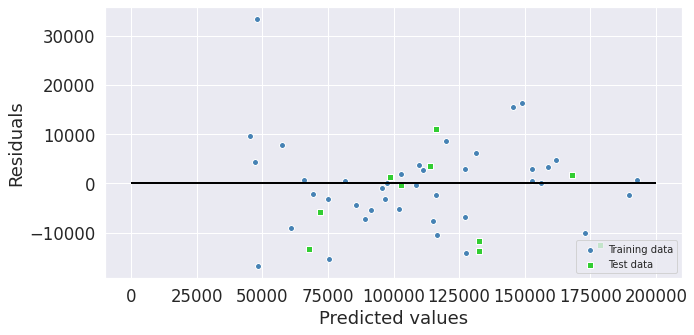

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

In [20]:
# Regression Intercept and Coefficients

print('Regression Intercept: {}'.format(round(lr.fit(X_train, y_train).intercept_,2)))
print('Regression Coefficients: {} \n'.format(np.round(lr.fit(X_train, y_train).coef_,2)))

# Mean Absolute Error, RMSE, Explained Variance Score, and R2 Score on Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

print("Mean Absolute Error on training data : %.2f" % mean_absolute_error(y_train, y_train_pred)**0.5)
print("Mean Absolute Error on test data : %.2f \n" % mean_absolute_error(y_test, y_test_pred)**0.5)

print("RMSE on training data : %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE on test data : %.2f \n" % mean_squared_error(y_test, y_test_pred)**0.5)

print('Training set explained variance score : %.3f' % explained_variance_score(y_train, y_train_pred))
print('Test set explained variance score : %.3f \n' % explained_variance_score(y_test, y_test_pred))

print('Training set R2 score : %.3f' % r2_score(y_train, y_train_pred))
print('Test set R2 score : %.3f' % r2_score(y_test, y_test_pred))

Regression Intercept: 44153.95
Regression Coefficients: [ 8.6640000e+01 -8.7265000e+02  7.8601000e+02  1.2789218e+05
  3.4992800e+03  1.7272030e+04] 

Mean Absolute Error on training data : 79.63
Mean Absolute Error on test data : 86.69 

RMSE on training data : 9031.67
RMSE on test data : 9137.99 

Training set explained variance score : 0.950
Test set explained variance score : 0.947 

Training set R2 score : 0.950
Test set R2 score : 0.935


## K-Fold Cross Validation Evaluation of Linear Regression Model

In [21]:
# K-Fold Cross Validation and R2 Score ranges on Training and Test sets
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

print('K-Fold Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('K-Fold Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

K-Fold Training set R^2 score range: 0.951 +/- 0.008
K-Fold Test set R^2 score range: 0.937 +/- 0.028


## Lasso, Ridge, and ElasticNet regularization methods 

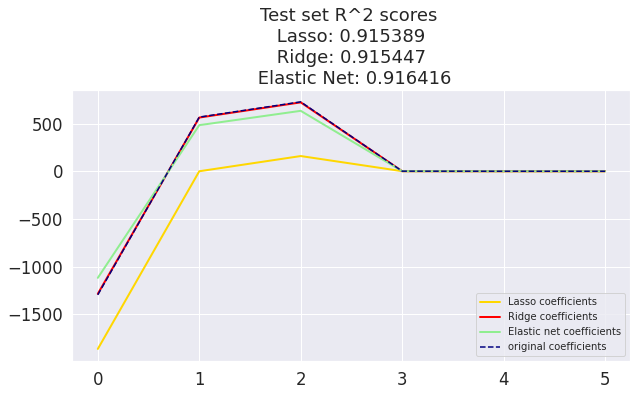

In [22]:
# Lasso - L1 regularization
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

# Ridge - L2 regularization
from sklearn.linear_model import Ridge

alpha = 0.1
ridge = Ridge(alpha=alpha)

y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

# ElasticNet - L1 & L2 combined regularization 
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.5)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

# Evaluation of Test data for linear regularization methods
plt.figure(figsize=(10,5))
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(ridge.coef_, color='red', linewidth=2,
         label='Ridge coefficients')
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lr.coef_, '--', color='navy', label='original coefficients')

plt.title("Test set R^2 scores \n Lasso: %f \n Ridge: %f \n Elastic Net: %f"
          % (r2_score_lasso, r2_score_ridge, r2_score_enet))
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

## Polynomial Regression Model 

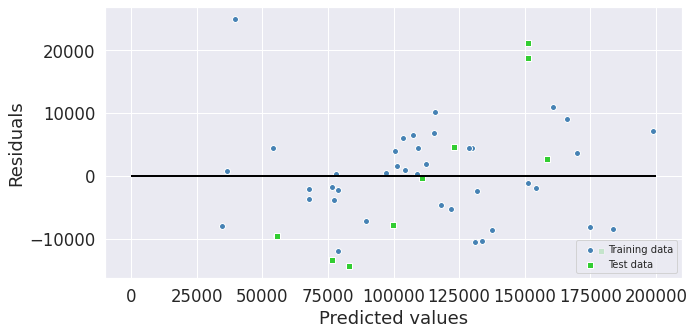

K-Fold Training set R^2 score range: 0.967 +/- 0.005
K-Fold Test set R^2 score range: 0.900 +/- 0.042


In [23]:
from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly_reg = pipeline.Pipeline([('poly', poly), ('lr', lr)])
poly_reg.fit(X_train, y_train)

y_train_pred = poly_reg.predict(X_train)
y_test_pred = poly_reg.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()


# K-Fold Cross Validation and R2 Score ranges on Training and Test sets
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    poly_reg.fit(X_train, y_train)
    y_train_pred = poly_reg.predict(X_train)
    y_test_pred = poly_reg.predict(X_test)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

print('K-Fold Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('K-Fold Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

##  Principal Component Analysis for Dimensionality Reduction of Features

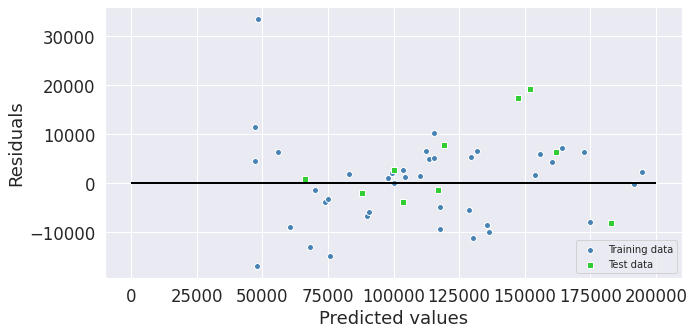

K-Fold Training set R^2 score range: 0.950 +/- 0.007
K-Fold Test set R^2 score range: 0.943 +/- 0.024


In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('pca', PCA(n_components=3)),('lr', LinearRegression())])

pipe_lr.fit(X_train, y_train)

y_train_pred = pipe_lr.predict(X_train)
y_test_pred = pipe_lr.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation and R2 Score ranges on Training and Test sets
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    pipe_lr.fit(X_train, y_train)
    y_train_pred = pipe_lr.predict(X_train)
    y_test_pred = pipe_lr.predict(X_test)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

print('K-Fold Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('K-Fold Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

## Support Vector Machine Regression Model using GridSearchCV for best parameters

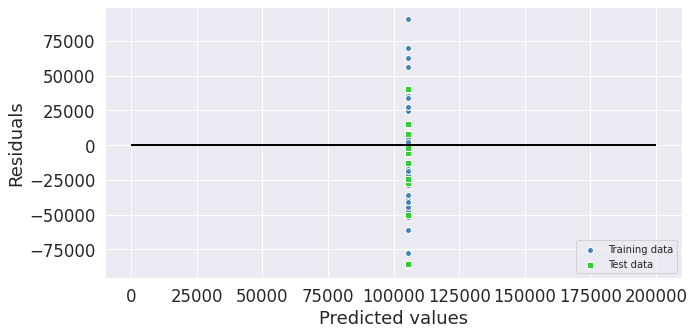

Training set R2 score : -0.013
Test set R2 score : -0.188


In [25]:
# SVR with GridSearchCV for best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

best_svr.fit(X_train, y_train)

y_train_pred = best_svr.predict(X_train)
y_test_pred = best_svr.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

print('Training set R2 score : %.3f' % r2_score(y_train, y_train_pred))
print('Test set R2 score : %.3f' % r2_score(y_test, y_test_pred))


## Random Forest Regression Model

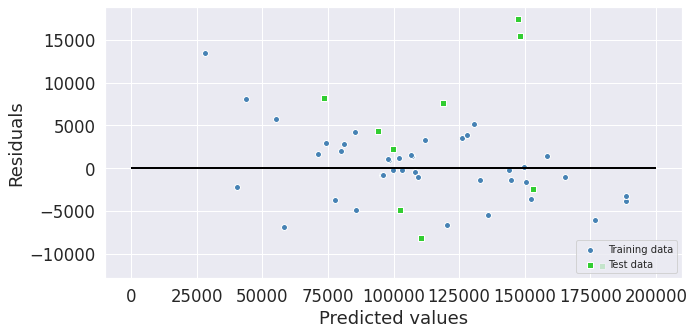

Training set R^2 score range: 0.989 +/- 0.001
Test set R^2 score range: 0.941 +/- 0.026


In [26]:
# Random Forest Model Fitting

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation and R2 Score ranges on Training and Test sets
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

print('Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

## XGBoost Regression Model

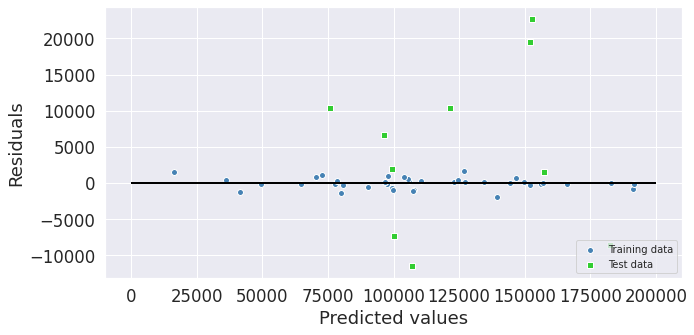

K-Fold Training set R^2 score range: 0.999 +/- 0.000
K-Fold Test set R^2 score range: 0.921 +/- 0.023


In [27]:
# XGBoost Model Fitting

import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

xg_reg.fit(X_train, y_train)

y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# Plot of Residuals and Predicted Values on Training and Test sets
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# K-Fold Cross Validation and R2 Score ranges on Training and Test sets
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    xg_reg.fit(X_train, y_train)
    y_train_pred = xg_reg.predict(X_train)
    y_test_pred = xg_reg.predict(X_test)
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

print('K-Fold Training set R^2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('K-Fold Test set R^2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

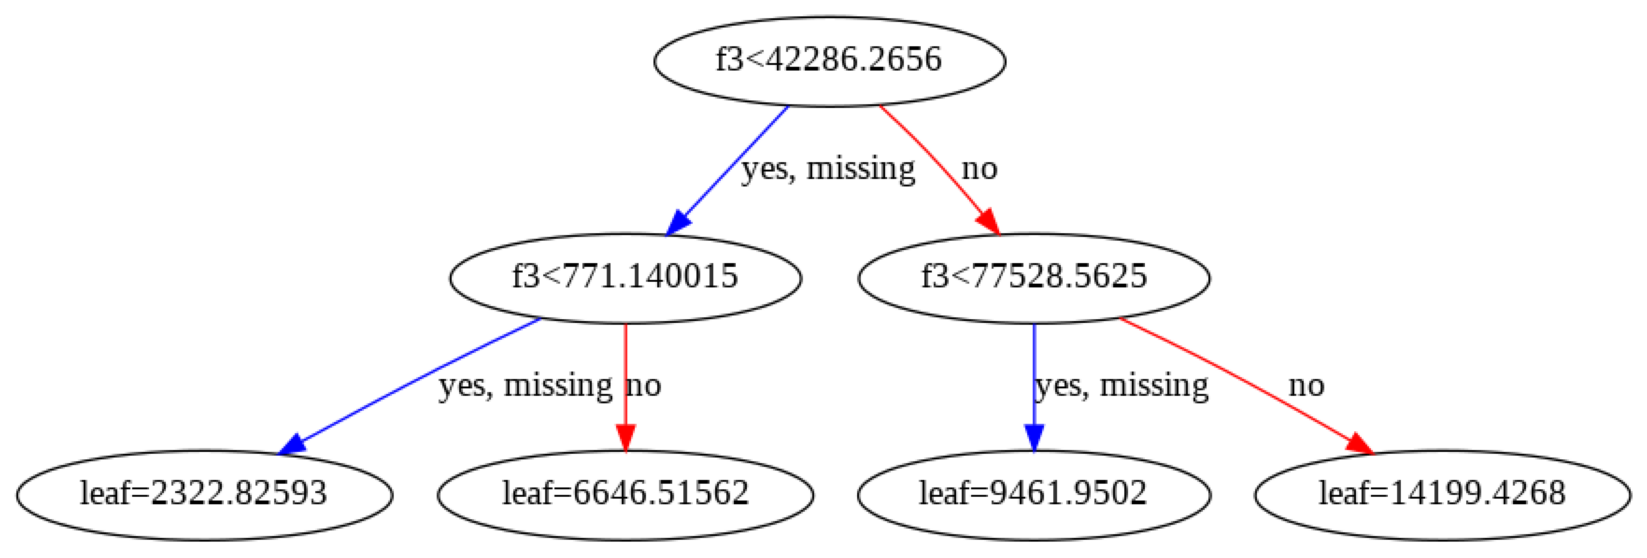

In [28]:
plt.rcParams['figure.figsize'] = [500, 10]
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

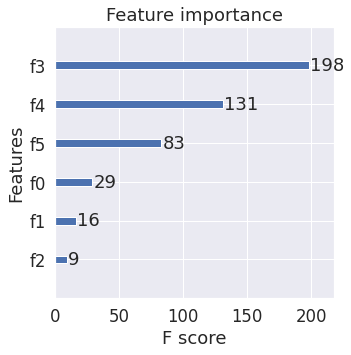

In [29]:
plt.rcParams['figure.figsize'] = [5,5]
xgb.plot_importance(xg_reg)
plt.show()

## ANN Regression Model using Tensorflow 2 and Keras

In [30]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

!pip install -U tensorboard >piplog 2>&1

In [31]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [32]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(np.float32), y.astype(np.float32), test_size=0.2, random_state=1)

In [35]:
X_train.shape

(40, 6)

In [36]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[1] // 2,activation='relu'))
model.add(Dense(X_train.shape[1] // 3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          batch_size=100,epochs=400, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/400
1/1 [==============================] - 0s 152ms/step - loss: 9278794752.0000 - val_loss: 8316688896.0000
Epoch 2/400
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 23ms/step - loss: 9261164544.0000 - val_loss: 8259944448.0000
Epoch 3/400
1/1 [==============================] - 0s 29ms/step - loss: 9591398400.0000 - val_loss: 8202910208.0000
Epoch 4/400
1/1 [==============================] - 0s 24ms/step - loss: 8810391552.0000 - val_loss: 8145626624.0000
Epoch 5/400
1/1 [==============================] - 0s 23ms/step - loss: 9078865920.0000 - val_loss: 8087918080.0000
Epoch 6/400
1/1 [==============================] - 0s 25ms/step - loss: 9075010560.0000 - val_loss: 8029813760.0000
Epoch 7/400
1/1 [==============================] - 0s 21ms/step - loss: 8898397184.0000 - val_loss: 7971254272.0000
Epoch 8/400
1/1 [==============================] - 0s 21ms/step - loss: 9003571200.0000 - val_loss: 7912471552.0000

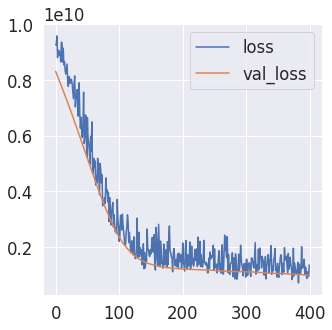

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

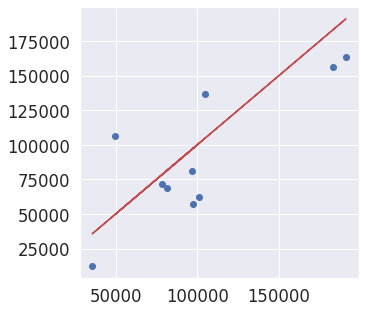

In [38]:
predictions = model.predict(X_test)

# Model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [39]:
# Mean Absolute Error, RMSE and R2 Score on ANN Regression Model
print("MSE on test data : %.2f" % mean_absolute_error(y_test, predictions))
print("RMSE on test data : %.2f" % mean_squared_error(y_test, predictions)**0.5)
print('Test set explained variance score : %.3f' % explained_variance_score(y_test,predictions))
print('Test set R2 score : %.3f' % r2_score(y_test,predictions))

MSE on test data : 27903.01
RMSE on test data : 31296.02
Test set explained variance score : 0.614
Test set R2 score : 0.568


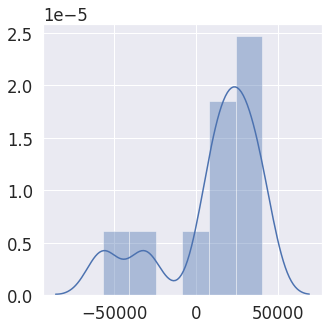

In [40]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions
sns.distplot(errors)

In [41]:
!tensorboard dev upload --logdir ./logs

2020-08-20 20:31:57.162283: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Data for the "histograms" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Data for the "hparams" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.

View your TensorBoard live at: https://tensorboard.dev/experiment/WP0ZX0kdQqe8Mg2vAvrVeQ/

[2020-08-20T20:31:59] Uploader started.
[2020-08-20T20:33:4